# Hao_PBMC Level 2 ACT annotation result
Your JodID:
http://xteam.xbio.top/ACT/ResultAction.action?jobID=20240430033953CRAMYI9KTDCEF7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!ls

ACT_Annotation_L2.xlsx          ACT_annotation_L2_UMAP_v2.ipynb
ACT_Annotation_L2_v1.txt        L2_query.txt
ACT_Annotation_L2_v2.txt        query.ipynb
ACT_annotation_L2_UMAP.ipynb    ~$ACT_Annotation_L2.xlsx


In [3]:
annot = pd.read_csv('ACT_Annotation_L2_v2.txt', index_col=0, sep='\t')

In [4]:
annot = annot.rename(columns={'whg.overlap': 'canonical.marker.overlap', 'gsea.overlap': 'gsea.DEG.overlap'})
annot.head(12)

Cluster                             Cell.Type  \
Order                                                              
1                Clus_ASDC           Plasmacytoid dendritic cell   
2                Clus_ASDC                              Monocyte   
3                Clus_ASDC                 Suppressor macrophage   
4                Clus_ASDC                            Macrophage   
5                Clus_ASDC  CD1c-positive myeloid dendritic cell   
6                Clus_ASDC                    Classical monocyte   
7                Clus_ASDC       Monocyte-derived dendritic cell   
8                Clus_ASDC                            Neutrophil   
9                Clus_ASDC           Conventional dendritic cell   
10               Clus_ASDC                         Memory B cell   
1      Clus_B_intermediate                          Naive B cell   
2      Clus_B_intermediate                         Memory B cell   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      3.270208e-15  2.142129e-16  0.003070             6/93   
2      2.944063e-09  7.152962e-12  0.187828            8/218   
3      8.110853e-09  1.398423e-10       NaN             2/16   
4      5.354531e-07  2.994100e-09  0.172172            8/281   
5      1.055221e-05  2.729019e-07       NaN             2/15   
6      4.570975e-05  1.576198e-06       NaN            3/122   
7      3.530419e-04  1.110976e-05  0.092632             2/26   
8      1.596238e-03  7.568372e-05       NaN            3/117   
9      2.115818e-03  1.094389e-04       NaN             2/22   
10     4.431192e-03  2.482996e-04       NaN             2/39   
1      9.547686e-18  3.087819e-20  0.082579             2/22   
2      4.923752e-17  3.131048e-20  0.583721             4/39   

      Over.Markers.gsea                     canonical.marker.overlap  \
Order                                                                  
1                 9/295             PLAC8,CST3,SOX4,TCF4,IRF8,CCDC50   
2                10/365   CST3,TXN,ANXA2,MALAT1,FTL,S100A9,CD52,SAT1   
3                   0/1                                  CST3,S100A9   
4                14/653  CST3,FTL,S100A9,CD52,B2M,MT-ND2,SAT1,MT-CO3   
5                  2/35                                  CST3,S100A9   
6                  2/66                            PLAC8,CST3,S100A9   
7                 8/577                                  CST3,S100A9   
8                 4/280                            PLAC8,CST3,S100A9   
9                  4/99                                    CST3,IRF8   
10                 2/44                                 S100A10,IRF8   
1                  6/66                                   MS4A1,IGHM   
2                  7/44                      MS4A1,BANK1,IGHM,GPR183   

                                        gsea.DEG.overlap  
Order                                                     
1      PLAC8,SOX4,TCF4,C12orf75,IRF8,TXN,APP,PLP2,CCDC50  
2      S100A10,PLAC8,CST3,SAMHD1,FCGRT,ANXA2,FTL,S100...  
3                                                    NaN  
4      S100A10,PLAC8,CST3,AXL,IRF8,SAMHD1,FCGRT,ANXA2...  
5                                            CST3,S100A9  
6                                            CST3,S100A9  
7          PPP1R14A,TXN,ANXA2,CCDC50,TMSB4X,FTL,B2M,SAT1  
8                                 PLAC8,TXN,S100A9,RPLP1  
9                                  CST3,IRF8,S100A9,SAT1  
10                                            PLAC8,CD52  
1                    MS4A1,BANK1,IGHM,CD79A,TMSB10,TXNIP  
2            MS4A1,RALGPS2,BANK1,IGHM,CD79A,TMSB10,TXNIP

In [5]:
annot['canonical.marker.overlap'] = annot['canonical.marker.overlap'].str.split(',').fillna('')
annot['gsea.DEG.overlap'] = annot['gsea.DEG.overlap'].str.split(',').fillna('')

In [6]:
annot['union'] = annot.apply(lambda row: list(set(row['canonical.marker.overlap']) | set(row['gsea.DEG.overlap'])), axis=1)
annot.head(12)

Cluster                             Cell.Type  \
Order                                                              
1                Clus_ASDC           Plasmacytoid dendritic cell   
2                Clus_ASDC                              Monocyte   
3                Clus_ASDC                 Suppressor macrophage   
4                Clus_ASDC                            Macrophage   
5                Clus_ASDC  CD1c-positive myeloid dendritic cell   
6                Clus_ASDC                    Classical monocyte   
7                Clus_ASDC       Monocyte-derived dendritic cell   
8                Clus_ASDC                            Neutrophil   
9                Clus_ASDC           Conventional dendritic cell   
10               Clus_ASDC                         Memory B cell   
1      Clus_B_intermediate                          Naive B cell   
2      Clus_B_intermediate                         Memory B cell   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      3.270208e-15  2.142129e-16  0.003070             6/93   
2      2.944063e-09  7.152962e-12  0.187828            8/218   
3      8.110853e-09  1.398423e-10       NaN             2/16   
4      5.354531e-07  2.994100e-09  0.172172            8/281   
5      1.055221e-05  2.729019e-07       NaN             2/15   
6      4.570975e-05  1.576198e-06       NaN            3/122   
7      3.530419e-04  1.110976e-05  0.092632             2/26   
8      1.596238e-03  7.568372e-05       NaN            3/117   
9      2.115818e-03  1.094389e-04       NaN             2/22   
10     4.431192e-03  2.482996e-04       NaN             2/39   
1      9.547686e-18  3.087819e-20  0.082579             2/22   
2      4.923752e-17  3.131048e-20  0.583721             4/39   

      Over.Markers.gsea                           canonical.marker.overlap  \
Order                                                                        
1                 9/295            [PLAC8, CST3, SOX4, TCF4, IRF8, CCDC50]   
2                10/365  [CST3, TXN, ANXA2, MALAT1, FTL, S100A9, CD52, ...   
3                   0/1                                     [CST3, S100A9]   
4                14/653  [CST3, FTL, S100A9, CD52, B2M, MT-ND2, SAT1, M...   
5                  2/35                                     [CST3, S100A9]   
6                  2/66                              [PLAC8, CST3, S100A9]   
7                 8/577                                     [CST3, S100A9]   
8                 4/280                              [PLAC8, CST3, S100A9]   
9                  4/99                                       [CST3, IRF8]   
10                 2/44                                    [S100A10, IRF8]   
1                  6/66                                      [MS4A1, IGHM]   
2                  7/44                       [MS4A1, BANK1, IGHM, GPR183]   

                                        gsea.DEG.overlap  \
Order                                                      
1      [PLAC8, SOX4, TCF4, C12orf75, IRF8, TXN, APP, ...   
2      [S100A10, PLAC8, CST3, SAMHD1, FCGRT, ANXA2, F...   
3                                                          
4      [S100A10, PLAC8, CST3, AXL, IRF8, SAMHD1, FCGR...   
5                                         [CST3, S100A9]   
6                                         [CST3, S100A9]   
7      [PPP1R14A, TXN, ANXA2, CCDC50, TMSB4X, FTL, B2...   
8                            [PLAC8, TXN, S100A9, RPLP1]   
9                             [CST3, IRF8, S100A9, SAT1]   
10                                         [PLAC8, CD52]   
1             [MS4A1, BANK1, IGHM, CD79A, TMSB10, TXNIP]   
2      [MS4A1, RALGPS2, BANK1, IGHM, CD79A, TMSB10, T...   

                                                   union  
Order                                                     
1      [SOX4, CCDC50, APP, PLP2, CST3, C12orf75, TCF4...  
2      [S100A9, FCGRT, ANXA2, SAMHD1, MALAT1, CST3, S...  

## Plot UMAP for marker genes (intersection with PreLect)

In [7]:
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/batch_corrected/Hao_PBMC_Harmony_unscaled.h5ad')
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
labels = adata.obs['celltype.l2']
types = np.unique(labels).tolist()
types

['ASDC',
 'B_intermediate',
 'B_memory',
 'B_naive',
 'CD14_Mono',
 'CD16_Mono',
 'CD4_CTL',
 'CD4_Naive',
 'CD4_Proliferating',
 'CD4_TCM',
 'CD4_TEM',
 'CD8_Naive',
 'CD8_Proliferating',
 'CD8_TCM',
 'CD8_TEM',
 'Doublet',
 'Eryth',
 'HSPC',
 'ILC',
 'MAIT',
 'NK',
 'NK_CD56bright',
 'NK_Proliferating',
 'Plasmablast',
 'Platelet',
 'Treg',
 'cDC1',
 'cDC2',
 'dnT',
 'gdT',
 'pDC']

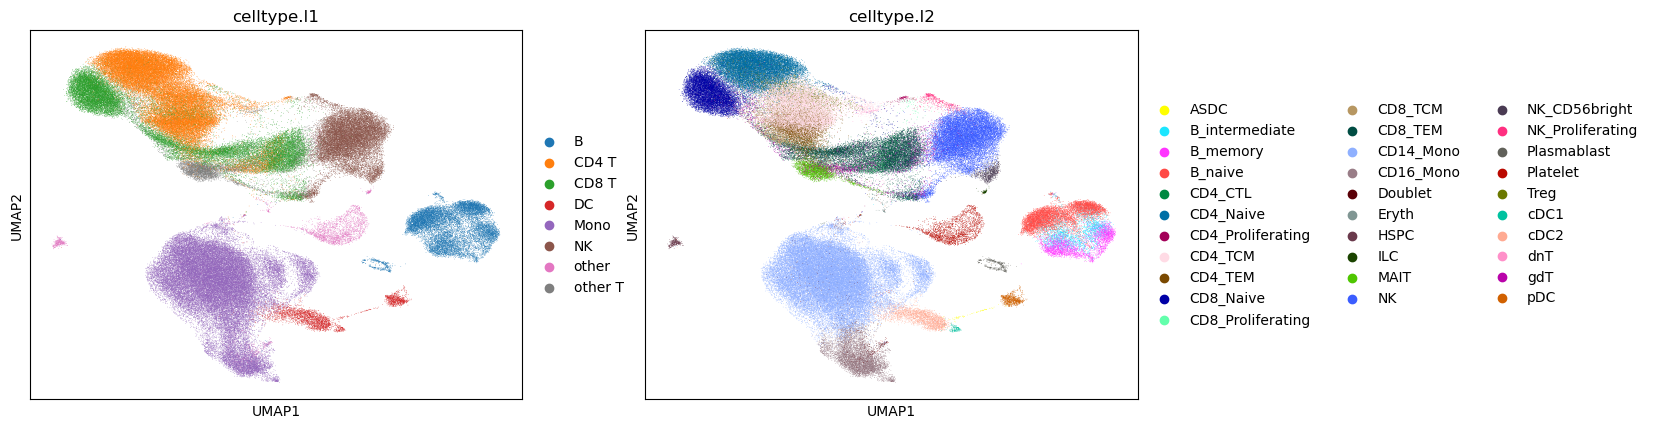

In [8]:
# UMAP embedding in adata
sc.pl.umap(adata, color=['celltype.l1', 'celltype.l2'], legend_loc="right margin")

## Plot UMAP of L2 overlapped marker genes (if celltype matched)

### B_memory 

In [ ]:
annot[annot['Cluster']=='Clus_B_memory']

In [ ]:
Bm_canon = annot[(annot['Cluster']=='Clus_B_memory') & (annot['Cell.Type']=='Memory B cell')]['canonical.marker.overlap'].tolist()[0]
print(Bm_canon)
sc.pl.umap(adata, color=Bm_canon)

### B_naive

In [ ]:
annot[annot['Cluster']=='Clus_B_naive']

In [ ]:
B_naive_canon = annot[(annot['Cluster']=='Clus_B_naive') & (annot['Cell.Type']=='Naive B cell')]['canonical.marker.overlap'].tolist()[0]
print(B_naive_canon)
sc.pl.umap(adata, color=B_naive_canon)

### CD14_mono 

In [ ]:
annot[annot['Cluster']=='Clus_CD14_Mono']

In [ ]:
cd14_mono_canon = annot[(annot['Cluster']=='Clus_CD14_Mono') & (annot['Cell.Type']=='CD14-positive monocyte')]['canonical.marker.overlap'].tolist()[0]
print(cd14_mono_canon)
sc.pl.umap(adata, color=cd14_mono_canon)

### CD16_mono 

In [ ]:
annot[annot['Cluster']=='Clus_CD16_Mono']

In [ ]:
cd16_mono_canon = annot[(annot['Cluster']=='Clus_CD16_Mono') & (annot['Cell.Type']=='CD14-positive, CD16-positive monocyte')]['canonical.marker.overlap'].tolist()[0]
print(cd16_mono_canon)
sc.pl.umap(adata, color=cd16_mono_canon)

### CD4_naive

In [9]:
annot[annot['Cluster']=='Clus_CD4_Naive']

Cluster                                          Cell.Type  \
Order                                                                      
1      Clus_CD4_Naive     Central memory CD4-positive, alpha-beta T cell   
2      Clus_CD4_Naive  Naive thymus-derived CD4-positive, alpha-beta ...   
3      Clus_CD4_Naive                                       Naive T cell   
4      Clus_CD4_Naive  Naive thymus-derived CD8-positive, alpha-beta ...   
5      Clus_CD4_Naive                    CD4-positive, alpha-beta T cell   
6      Clus_CD4_Naive                              Central memory T cell   
7      Clus_CD4_Naive                                             T cell   
8      Clus_CD4_Naive    Effector memory CD4-positive, alpha-beta T cell   
9      Clus_CD4_Naive                                    Effector T cell   
10     Clus_CD4_Naive                    CD8-positive, alpha-beta T cell   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      4.697492e-20  9.994663e-22       NaN             5/25   
2      1.118079e-13  8.801901e-15  0.014374             2/13   
3      5.008561e-12  2.084016e-14  0.461000             2/19   
4      1.990547e-10  1.772860e-11  0.032753             3/13   
5      2.900241e-10  2.270510e-07  0.000005             4/93   
6      2.670890e-09  3.409647e-10       NaN              2/7   
7      1.857316e-07  2.418187e-08  0.054271            6/221   
8      3.253835e-06  7.615358e-07       NaN             2/26   
9      1.021655e-05  2.608480e-06       NaN             3/48   
10     2.395032e-03  1.944391e-03  0.037330             2/96   

      Over.Markers.gsea                canonical.marker.overlap  \
Order                                                             
1                   0/1          [CCR7, TMSB10, MAL, LTB, LDHB]   
2                18/111                            [CCR7, TCF7]   
3                22/192                            [CCR7, TCF7]   
4                12/179                     [NOSIP, CCR7, TCF7]   
5                21/281                 [CCR7, TCF7, LTB, LDHB]   
6                   0/1                            [CCR7, TCF7]   
7                18/225  [GIMAP7, TRAT1, CCR7, TCF7, LTB, LDHB]   
8                   0/1                             [CCR7, MAL]   
9                  0/67                      [NOSIP, LTB, LDHB]   
10                6/293                             [CCR7, LTB]   

                                        gsea.DEG.overlap  \
Order                                                      
1                                                          
2      [FHIT, TSHZ2, GIMAP7, NOSIP, TRAT1, CCR7, TMSB...   
3      [TOMM7, TSHZ2, GIMAP7, NOSIP, TRAT1, CCR7, TCF...   
4      [NOSIP, CCR7, TMSB10, TCF7, MAL, LTB, BCL11B, ...   
5      [IL6ST, TSHZ2, GIMAP7, NOSIP, TRAT1, CCR7, TCF...   
6                                                          
7      [GIMAP7, NOSIP, TRAT1, CCR7, TCF7, MAL, LTB, B...   
8                                                          
9                                                          
10               [GIMAP7, LTB, CD3G, ITM2A, LDHB, SARAF]   

                                                   union  
Order                                                     
1                         [CCR7, LTB, LDHB, MAL, TMSB10]  
2      [CCR7, SATB1, TCF7, TMSB10, LINC00861, LDHB, S...  
3      [CCR7, SATB1, RPS25, TCF7, RPS27, TOMM7, LINC0...  
4      [NOSIP, CCR7, LTB, MAL, TCF7, TMSB10, TRABD2A,...  
5      [CCR7, SATB1, RPS25, TCF7, RPS27, LDHB, SARAF,...  
6                                           [CCR7, TCF7]  
7      [CCR7, RPS25, TCF7, RPS27, LINC00861, LDHB, SA...  
8                                            [CCR7, MAL]  
9                                     [NOSIP, LTB, LDHB]  
10         [CCR7, LTB, ITM2A, LDHB, GIMAP7, SARAF, CD3G]

['CCR7', 'TCF7']


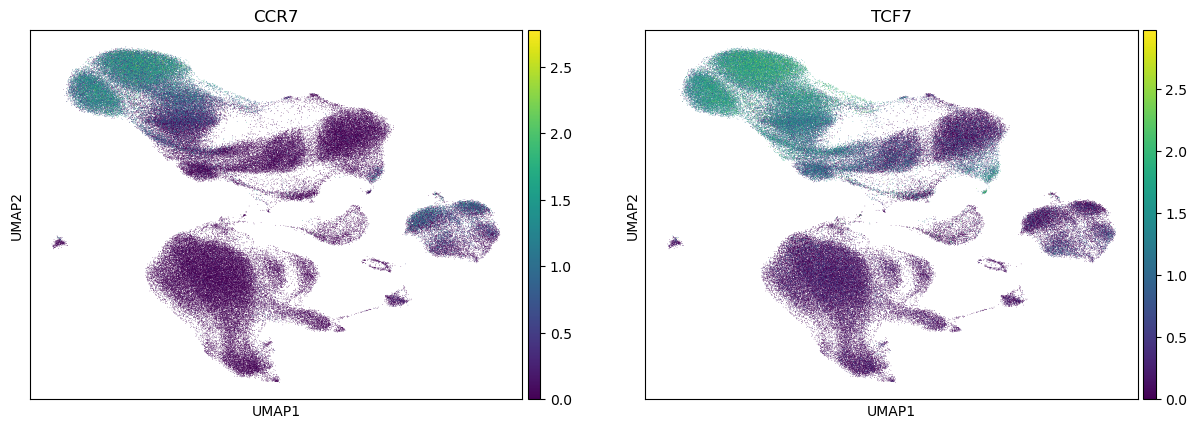

In [10]:
name = 'Naive thymus-derived CD4-positive, alpha-beta T cell'
cd4_naive_canon = annot[(annot['Cluster']=='Clus_CD4_Naive') & (annot['Cell.Type']==name)]['canonical.marker.overlap'].tolist()[0]
print(cd4_naive_canon)
sc.pl.umap(adata, color=cd4_naive_canon)

### CD4_proliferating

In [ ]:
annot[annot['Cluster']=='Clus_CD4_Proliferating']

In [ ]:
cd4_pro_canon = annot[(annot['Cluster']=='Clus_CD4_Proliferating') & (annot['Cell.Type']=='Proliferating CD4-positive, alpha-beta T cell')]['canonical.marker.overlap'].tolist()[0]
print(cd4_pro_canon)
sc.pl.umap(adata, color=cd4_pro_canon)

### CD4_TCM

In [ ]:
annot[annot['Cluster']=='Clus_CD4_TCM']

In [ ]:
cd4_tcm_canon = annot[(annot['Cluster']=='Clus_CD4_TCM') & (annot['Cell.Type']=='Central memory CD4-positive, alpha-beta T cell')]['canonical.marker.overlap'].tolist()[0]
# Central memory CD4-positive, alpha-beta T cell
print(cd4_tcm_canon)
sc.pl.umap(adata, color=cd4_tcm_canon)

### CD4_TEM

In [ ]:
annot[annot['Cluster']=='Clus_CD4_TEM']

In [ ]:
cd4_tem_canon = annot[(annot['Cluster']=='Clus_CD4_TEM') & (annot['Cell.Type']=='Effector memory CD4-positive, alpha-beta T cell')]['canonical.marker.overlap'].tolist()[0]
# Effector memory CD4-positive, alpha-beta T cell
print(cd4_tem_canon)
sc.pl.umap(adata, color=cd4_tem_canon)

### CD8_naive

In [11]:
annot[annot['Cluster']=='Clus_CD8_Naive']

Cluster                                          Cell.Type  \
Order                                                                      
1      Clus_CD8_Naive  Naive thymus-derived CD8-positive, alpha-beta ...   
2      Clus_CD8_Naive     Central memory CD8-positive, alpha-beta T cell   
3      Clus_CD8_Naive                    CD8-positive, alpha-beta T cell   
4      Clus_CD8_Naive                                       Naive T cell   
5      Clus_CD8_Naive          CD8-positive, alpha-beta cytotoxic T cell   
6      Clus_CD8_Naive    Effector memory CD8-positive, alpha-beta T cell   
7      Clus_CD8_Naive                                             T cell   
8      Clus_CD8_Naive              Double-positive, alpha-beta thymocyte   
9      Clus_CD8_Naive                                   Mature NK T cell   
10     Clus_CD8_Naive  Naive thymus-derived CD4-positive, alpha-beta ...   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      1.007261e-40  9.295346e-44  0.227000             6/13   
2      4.691331e-25  1.996311e-26       NaN              3/9   
3      5.836319e-25  3.088266e-26  0.018935             3/96   
4      3.417929e-22  2.407611e-24  0.212212             5/19   
5      1.340901e-20  1.011520e-21  0.026624             3/51   
6      5.149070e-19  6.792163e-20       NaN             3/44   
7      5.149070e-19  6.185730e-21  0.253507            6/221   
8      2.882056e-17  4.905627e-18       NaN              2/5   
9      2.756588e-16  1.841448e-18  0.678899             4/39   
10     1.007988e-15  1.127088e-16  0.046653             3/13   

      Over.Markers.gsea                canonical.marker.overlap  \
Order                                                             
1                23/179  [CD8B, CD8A, NELL2, LEF1, NOSIP, CCR7]   
2                  4/40                      [CD8B, CD8A, CCR7]   
3                 8/293                      [CD8B, CD8A, CCR7]   
4                20/192          [CD8B, CD8A, LEF1, CCR7, NPM1]   
5                 8/175                       [CD8B, CD8A, CD7]   
6                  2/78                      [CD8B, CD8A, CCR7]   
7                21/225     [CD8B, CD8A, LEF1, CCR7, AIF1, CD7]   
8                   0/1                            [CD8B, CD8A]   
9                 5/141                 [CD8B, CD8A, CCR7, CD7]   
10               12/111                       [LEF1, CCR7, ATM]   

                                        gsea.DEG.overlap  \
Order                                                      
1      [CD8B, CD8A, LINC02446, RGS10, NELL2, LEF1, NO...   
2                          [CD8B, CD8A, LINC02446, CCR7]   
3      [CD8B, CD8A, LEPROTL1, UQCRB, HCST, CD7, SARAF...   
4      [RGS10, NUCB2, LEF1, NOSIP, LEPROTL1, RPS5, RP...   
5      [CD8B, CD8A, LEPROTL1, HCST, ATM, CD7, SARAF, ...   
6                                           [CD8B, CD8A]   
7      [CD8B, CD8A, RGS10, NUCB2, LEF1, NOSIP, PRMT2,...   
8                                                          
9                          [LEF1, HCST, AIF1, CD7, CD3D]   
10     [CD8B, LEF1, NOSIP, LEPROTL1, RPS5, CCR7, HCST...   

                                                   union  
Order                                                     
1      [CCR7, CD8A, CD3D, PDE3B, LINC02446, PIK3IP1, ...  
2                          [LINC02446, CCR7, CD8A, CD8B]  
3      [CCR7, LEPROTL1, CD8A, CD3D, UQCRB, SARAF, HCS...  
4      [CCR7, CD8A, CD3D, PDE3B, ACTG1, PIK3IP1, RPS1...  
5      [LEPROTL1, CD8A, CD3D, ATM, SARAF, HCST, CD8B,...  
6                                     [CCR7, CD8A, CD8B]  
7      [CCR7, CD8A, CD3D, PIK3IP1, RPS13, AIF1, SARAF...  
8                                           [CD8B, CD8A]  
9        [CCR7, CD8A, CD3D, LEF1, AIF1, HCST, CD8B, CD7]  
10     [CCR7, NOSIP, LEPROTL1, HCST, RPS5, ATM, ACTG1...

['CD8B', 'CD8A', 'NELL2', 'LEF1', 'NOSIP', 'CCR7']


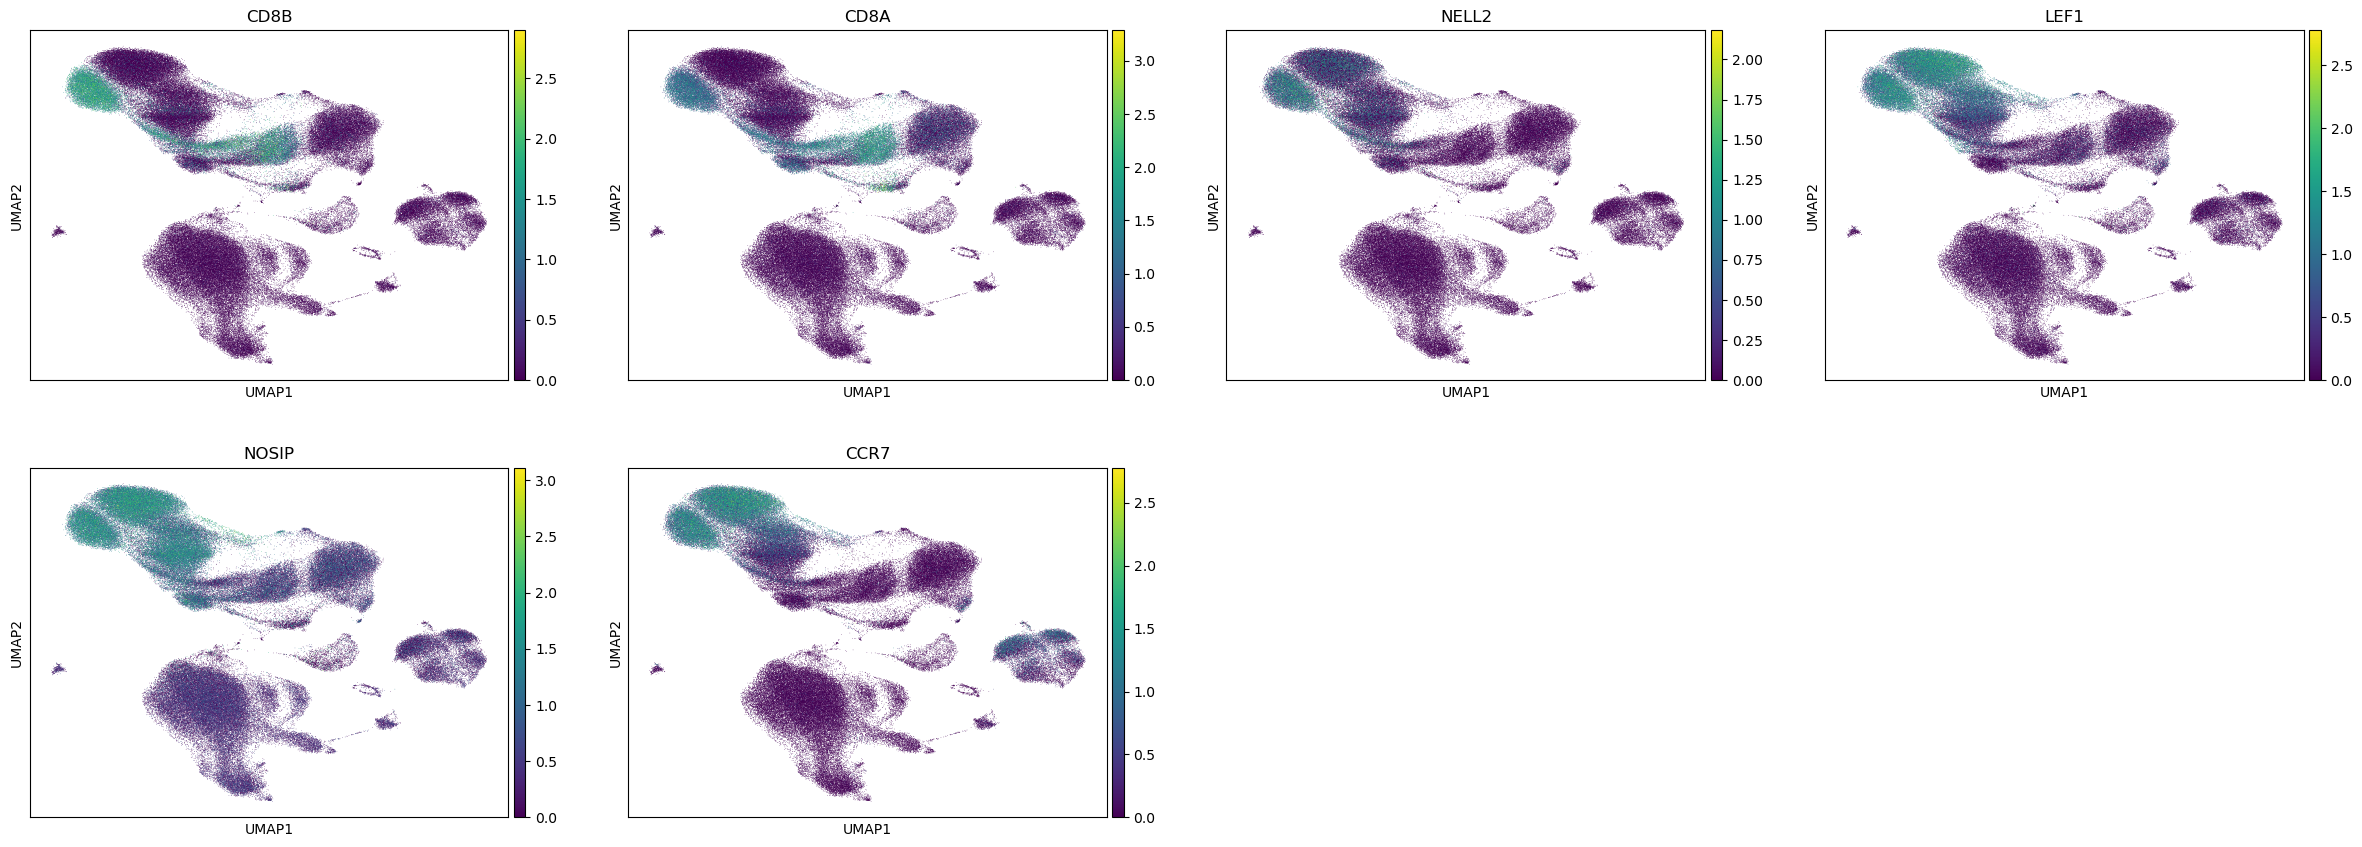

In [12]:
name = 'Naive thymus-derived CD8-positive, alpha-beta T cell'
cd8_naive_canon = annot[(annot['Cluster']=='Clus_CD8_Naive') & (annot['Cell.Type']==name)]['canonical.marker.overlap'].tolist()[0]
print(cd8_naive_canon)
sc.pl.umap(adata, color=cd8_naive_canon)

### CD8_TCM

In [13]:
annot[annot['Cluster']=='Clus_CD8_TCM']

Cluster                                          Cell.Type  \
Order                                                                    
1      Clus_CD8_TCM     Central memory CD4-positive, alpha-beta T cell   
2      Clus_CD8_TCM                    CD8-positive, alpha-beta T cell   
3      Clus_CD8_TCM    Effector memory CD8-positive, alpha-beta T cell   
4      Clus_CD8_TCM    Effector memory CD4-positive, alpha-beta T cell   
5      Clus_CD8_TCM                    CD4-positive, alpha-beta T cell   
6      Clus_CD8_TCM          CD8-positive, alpha-beta cytotoxic T cell   
7      Clus_CD8_TCM                                   Mature NK T cell   
8      Clus_CD8_TCM  Naive thymus-derived CD8-positive, alpha-beta ...   
9      Clus_CD8_TCM     Central memory CD8-positive, alpha-beta T cell   
10     Clus_CD8_TCM              Double-positive, alpha-beta thymocyte   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      9.036649e-37  3.845383e-38       NaN             8/25   
2      8.621421e-36  3.835422e-37  0.016125             7/96   
3      2.170794e-34  1.056869e-35  0.020463             4/44   
4      2.768236e-33  2.944932e-34       NaN             4/26   
5      2.084553e-28  4.503636e-26  0.000008             8/93   
6      3.706730e-27  3.270598e-27  0.002483             5/51   
7      5.667889e-24  4.769996e-26  0.334862             5/39   
8      2.275872e-23  1.755621e-25  0.421699             3/13   
9      9.872820e-20  5.317731e-21  0.086681              3/9   
10     8.156217e-17  2.082438e-17       NaN              2/5   

      Over.Markers.gsea                           canonical.marker.overlap  \
Order                                                                        
1                   0/1  [IL7R, ANXA1, ZFP36L2, ITGB1, LTB, KLF2, LDHB,...   
2                13/293      [CD8B, CCL5, CD8A, IL7R, ITGB1, LTB, S100A10]   
3                  6/78                           [CD8B, CCL5, CD8A, IL7R]   
4                   0/1                         [CCL5, IL7R, ANXA1, ITGB1]   
5                10/281  [CD8B, CCL5, CD8A, IL7R, ANXA1, COTL1, LTB, LDHB]   
6                11/175                     [CD8B, CCL5, CD8A, ANXA1, VIM]   
7                 5/141                     [CD8B, CCL5, CD8A, IL7R, IL32]   
8                12/179                                 [CD8B, CD8A, IL7R]   
9                  7/40                                 [CD8B, CD8A, IL7R]   
10                  0/1                                       [CD8B, CD8A]   

                                        gsea.DEG.overlap  \
Order                                                      
1                                                          
2      [CD8B, CCL5, CD8A, IL7R, ANXA1, ZFP36L2, COTL1...   
3                 [CD8B, CCL5, CD8A, IL7R, ANXA1, ITGB1]   
4                                                          
5      [CCL5, IL7R, ANXA1, ZFP36L2, ITGB1, LTB, LDHB,...   
6      [CD8B, CCL5, CD8A, IL7R, ZFP36L2, ITGB1, COTL1...   
7                          [CCL5, IL7R, YBX3, LTB, IL32]   
8      [CD8B, CCL5, CD8A, IL7R, ZFP36L2, LTB, KLF2, L...   
9       [CD8B, CCL5, CD8A, IL7R, ZFP36L2, COTL1, CLDND1]   
10                                                         

                                                   union  
Order                                                     
1      [KLF2, LTB, IL32, ZFP36L2, ITGB1, IL7R, LDHB, ...  
2      [CD8A, IL32, ITGB1, S100A10, LDHB, CCL5, ANXA1...  
3                 [CD8A, ITGB1, IL7R, CCL5, CD8B, ANXA1]  
4                             [CCL5, IL7R, ANXA1, ITGB1]  
5      [LEPROTL1, CD8A, LTB, IL32, ZFP36L2, ITGB1, IL...  
6      [CD8A, IL32, ITGB1, CCL5, ANXA1, LEPROTL1, LTB...  
7              [CD8A, LTB, YBX3, IL32, IL7R, CCL5, CD8B]  
8      [KLF2, LEPROTL1, CD8A, LTB, IL32, ZFP36L2, GPR...  
9       [CD8A, ZFP36L2, IL7R, COTL1, CCL5, CLDND1, CD8B]  
10                                          [CD

['CD8B', 'CD8A', 'IL7R']


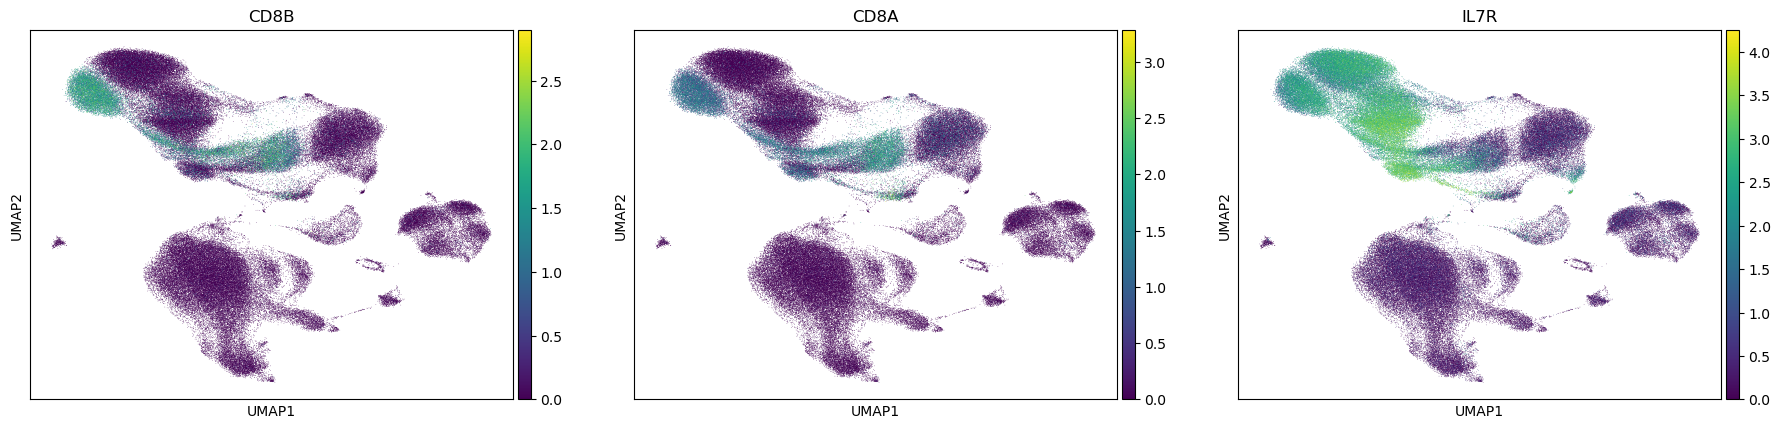

In [14]:
cd8_tcm = annot[(annot['Cluster']=='Clus_CD8_TCM') & (annot['Cell.Type']=='Central memory CD8-positive, alpha-beta T cell')]['canonical.marker.overlap'].tolist()[0]
print(cd8_tcm)
sc.pl.umap(adata, color=cd8_tcm)

### CD8_TEM

In [15]:
annot[annot['Cluster']=='Clus_CD8_TEM']

Cluster                                          Cell.Type  \
Order                                                                    
1      Clus_CD8_TEM    Effector memory CD8-positive, alpha-beta T cell   
2      Clus_CD8_TEM                                             T cell   
3      Clus_CD8_TEM                                   Mature NK T cell   
4      Clus_CD8_TEM                    CD8-positive, alpha-beta T cell   
5      Clus_CD8_TEM          CD8-positive, alpha-beta cytotoxic T cell   
6      Clus_CD8_TEM  Naive thymus-derived CD8-positive, alpha-beta ...   
7      Clus_CD8_TEM           Effector CD8-positive, alpha-beta T cell   
8      Clus_CD8_TEM     Central memory CD8-positive, alpha-beta T cell   
9      Clus_CD8_TEM              Double-positive, alpha-beta thymocyte   
10     Clus_CD8_TEM  Effector memory CD45RA-positive, alpha-beta T ...   

               Padj         whg.p    gsea.p Over.Markers.whg  \
Order                                                          
1      3.896710e-59  6.128564e-60  0.000937             9/44   
2      1.300382e-55  9.244134e-56  0.000442           12/221   
3      1.934522e-43  3.647369e-44  0.003171             8/39   
4      1.425504e-40  5.898047e-39  0.000021             8/96   
5      3.677494e-40  2.807652e-39  0.000141             6/51   
6      1.221892e-20  6.052579e-23  0.487386             2/13   
7      1.358408e-18  2.312183e-19       NaN              3/8   
8      2.780264e-18  2.953061e-19  0.038419              2/9   
9      6.094439e-18  1.296689e-18       NaN              2/5   
10     1.330540e-15  5.079115e-16  0.015174             3/13   

      Over.Markers.gsea                           canonical.marker.overlap  \
Order                                                                        
1                  8/78  [CD8A, CD8B, CCL5, TRAC, NKG7, CST7, TRGC2, KL...   
2                19/225  [CD8A, CD8B, CCL5, TRAC, NKG7, IL32, TRBC2, KL...   
3                13/141  [CD8A, CD8B, CCL5, NKG7, IL32, TRGC2, KLRD1, K...   
4                18/293  [CD8A, CD8B, CCL5, TRAC, DUSP2, NKG7, TRBC2, K...   
5                17/175              [CD8A, CD8B, CCL5, NKG7, CST7, TRGC2]   
6                18/179                                       [CD8A, CD8B]   
7                   0/1                                 [CD8A, CD8B, NKG7]   
8                  5/40                                       [CD8A, CD8B]   
9                   0/1                                       [CD8A, CD8B]   
10               14/243                                 [CCL5, NKG7, CST7]   

                                        gsea.DEG.overlap  \
Order                                                      
1      [CD8A, CD8B, CCL5, NKG7, CST7, KLRD1, EEF1A1, ...   
2      [CD8A, CD8B, CCL5, TRAC, DUSP2, NKG7, CD3D, CD...   
3      [CCL5, TRAC, DUSP2, NKG7, CD3D, CD3G, IL32, TR...   
4      [CD8A, CD8B, CCL5, TRAC, DUSP2, NKG7, CD3D, CD...   
5      [CD8A, CD8B, CCL5, TRAC, DUSP2, NKG7, CD3D, CD...   
6      [CD8A, CD8B, CCL5, DUSP2, NKG7, CD3D, CD3G, IL...   
7                                                          
8                       [CD8A, CD8B, CCL5, DUSP2, KLRD1]   
9                                                          
10     [CCL5, DUSP2, NKG7, CD3D, CD3G, IL32, CST7, TR...   

                                                   union  
Order                                                     
1      [RPL28, TRGC2, CD8A, CST7, KLRD1, EEF1A1, KLRB...  
2      [CD8A, CD3D, PTMA, FTH1, TRBC2, IL32, TRAC, AC...  
3      [CD8A, CD3D, TRBC2, IL32, TRAC, ACTB, CCL5, CD...  
4      [CD8A, CD3D, TRBC2, IL32, TRAC, ACTB, CCL5, CD...  
5      [CD8A, CD3D, KLRB1, TRBC2, IL32, TRAC, CCL5, C...  
6      [CD8A, RPLP1, CD3D, MT-CO1, TRBC2, IL32, ACTG1...  
7                                     [NKG7, CD8B, CD8A]  
8                       [DUSP2, CD8A, KLRD1, CCL5, CD8B]  
9                                           [CD8B, CD8A]  
10     [MT-CO2, MT-CO3, CD3D, MT-CO1, IL32, ACT

['CD8A', 'CD8B', 'CCL5', 'TRAC', 'NKG7', 'CST7', 'TRGC2', 'KLRD1', 'KLRB1']


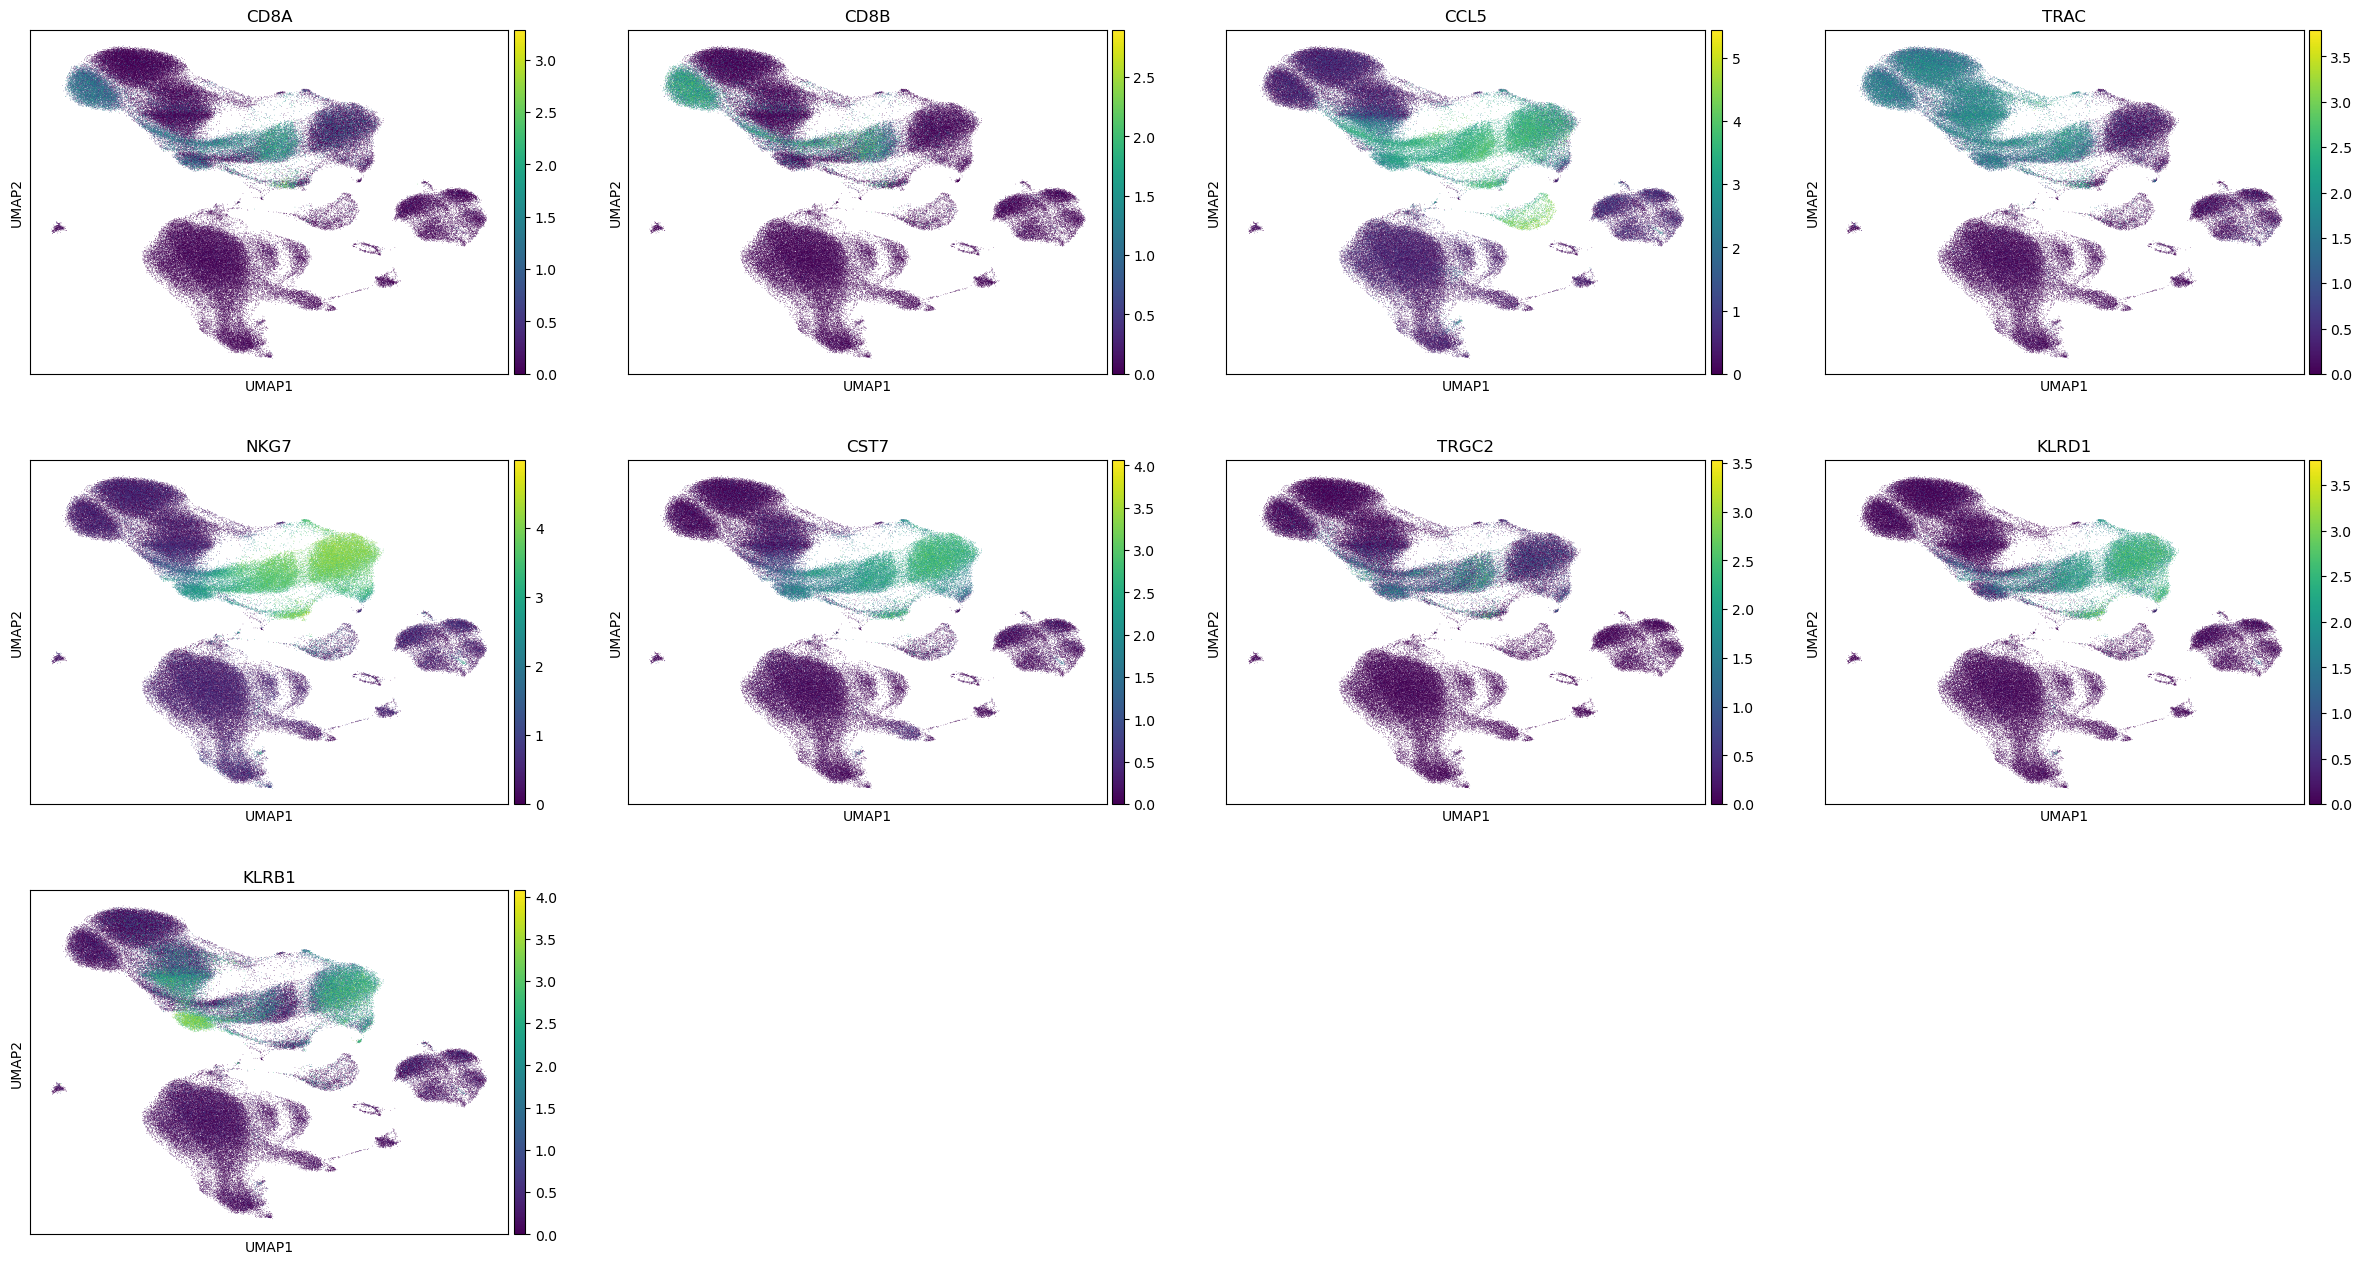

In [16]:
cd8_tem_canon = annot[(annot['Cluster']=='Clus_CD8_TEM') & (annot['Cell.Type']=='Effector memory CD8-positive, alpha-beta T cell')]['canonical.marker.overlap'].tolist()[0]
# Effector memory CD8-positive, alpha-beta T cell
print(cd8_tem_canon)
sc.pl.umap(adata, color=cd8_tem_canon)

### cDC1 and cDC2 (conventional DC)

In [ ]:
annot[annot['Cluster']=='Clus_cDC1']

In [ ]:
annot[annot['Cluster']=='Clus_cDC2']

In [ ]:
cdc1_canon = annot[(annot['Cluster']=='Clus_cDC1') & (annot['Cell.Type']=='Type 1 conventional dendritic cell')]['canonical.marker.overlap'].tolist()[0]
cdc2_canon = annot[(annot['Cluster']=='Clus_cDC2') & (annot['Cell.Type']=='Type 2 conventional dendritic cell')]['canonical.marker.overlap'].tolist()[0]
cdc_canon = annot[(annot['Cluster']=='Clus_cDC2') & (annot['Cell.Type']=='Conventional dendritic cell')]['canonical.marker.overlap'].tolist()[0]
print('cDC1:', cdc1_canon)
print('cDC2:', cdc2_canon)
print('cDC:', cdc_canon)

In [ ]:
sc.pl.umap(adata, color=cdc1_canon)
sc.pl.umap(adata, color=cdc2_canon)
sc.pl.umap(adata, color=list(set(cdc_canon) - set(cdc2_canon) - set(cdc1_canon)))

### gdT

In [ ]:
annot[annot['Cluster']=='Clus_gdT']

In [ ]:
gdt_canon = annot[(annot['Cluster']=='Clus_gdT') & (annot['Cell.Type']=='Gamma-delta T cell')]['canonical.marker.overlap'].tolist()[0]
print(gdt_canon)
sc.pl.umap(adata, color=gdt_canon)

### HSPC

In [ ]:
annot[annot['Cluster']=='Clus_HSPC']

In [ ]:
hspc_canon = annot[(annot['Cluster']=='Clus_HSPC') & (annot['Cell.Type']=='Hematopoietic stem cell')]['canonical.marker.overlap'].tolist()[0]
print(hspc_canon)
sc.pl.umap(adata, color=hspc_canon)

### MAIT

In [ ]:
annot[annot['Cluster']=='Clus_MAIT']

In [ ]:
mait_canon = annot[(annot['Cluster']=='Clus_MAIT') & (annot['Cell.Type']=='Mucosal invariant T cell')]['canonical.marker.overlap'].tolist()[0]
print(mait_canon)
sc.pl.umap(adata, color=mait_canon)

### NK

In [ ]:
annot[annot['Cluster']=='Clus_NK']

In [ ]:
NK_canon = annot[(annot['Cluster']=='Clus_NK') & (annot['Cell.Type']=='Natural killer cell')]['canonical.marker.overlap'].tolist()[0]
print(NK_canon)
sc.pl.umap(adata, color=NK_canon)

### pDC

In [17]:
annot[annot['Cluster']=='Clus_pDC']

Cluster                           Cell.Type          Padj  \
Order                                                               
1      Clus_pDC         Plasmacytoid dendritic cell  6.597600e-44   
2      Clus_pDC                         Plasma cell  1.441878e-08   
3      Clus_pDC                      Dendritic cell  1.100669e-05   
4      Clus_pDC                 Natural killer cell  1.100669e-05   
5      Clus_pDC  Plasmacytoid dendritic cell, human  4.194370e-04   
6      Clus_pDC                              B cell  1.084002e-03   
7      Clus_pDC                    Endothelial cell  2.205954e-03   
8      Clus_pDC                         Granulocyte  3.203137e-03   

              whg.p    gsea.p Over.Markers.whg Over.Markers.gsea  \
Order                                                              
1      8.779054e-44  0.000029             7/93             9/295   
2      1.864497e-10       NaN             3/64             3/333   
3      2.257681e-08  0.592789            5/143             8/307   
4      1.020452e-07  0.146682            2/150             5/223   
5      1.807918e-05       NaN              2/5               0/1   
6      2.653417e-05  0.157895            4/169             8/264   
7      1.426263e-04       NaN            5/466             6/268   
8      2.347126e-04       NaN             2/69              0/40   

                              canonical.marker.overlap  \
Order                                                    
1      [TCF4, GZMB, CCDC50, IRF8, JCHAIN, ITM2C, IRF7]   
2                                 [TCF4, GZMB, JCHAIN]   
3                     [TCF4, GZMB, IRF8, JCHAIN, IRF7]   
4                                        [GZMB, TXNIP]   
5                                       [CCDC50, IRF7]   
6                        [GZMB, JCHAIN, ITM2C, MT-ND3]   
7                  [JCHAIN, ITM2C, MALAT1, B2M, HLA-A]   
8                                       [TCF4, JCHAIN]   

                                        gsea.DEG.overlap  \
Order                                                      
1      [TCF4, GZMB, CCDC50, UGCG, IRF8, PPP1R14B, JCH...   
2                                   [JCHAIN, ITM2C, B2M]   
3      [TCF4, UGCG, IRF8, PPP1R14B, IRF7, TMSB4X, B2M...   
4                   [GZMB, TMSB4X, MALAT1, TXNIP, HLA-A]   
5                                                          
6      [TCF4, CCDC50, IRF8, JCHAIN, MALAT1, B2M, MT-C...   
7              [TCF4, TMSB4X, MALAT1, TXNIP, B2M, HLA-A]   
8                                                          

                                                   union  
Order                                                     
1      [CCDC50, IRF7, JCHAIN, UGCG, GZMB, PPP1R14B, T...  
2                       [B2M, TCF4, ITM2C, JCHAIN, GZMB]  
3      [TMSB4X, GZMB, HLA-A, PPP1R14B, B2M, TCF4, IRF...  
4                   [MALAT1, TMSB4X, TXNIP, GZMB, HLA-A]  
5                                         [IRF7, CCDC50]  
6      [CCDC50, MT-CO3, GZMB, HLA-A, MALAT1, B2M, MT-...  
7      [TMSB4X, TXNIP, HLA-A, MALAT1, B2M, TCF4, ITM2...  
8                                         [JCHAIN, TCF4]

['TCF4', 'GZMB', 'CCDC50', 'IRF8', 'JCHAIN', 'ITM2C', 'IRF7']


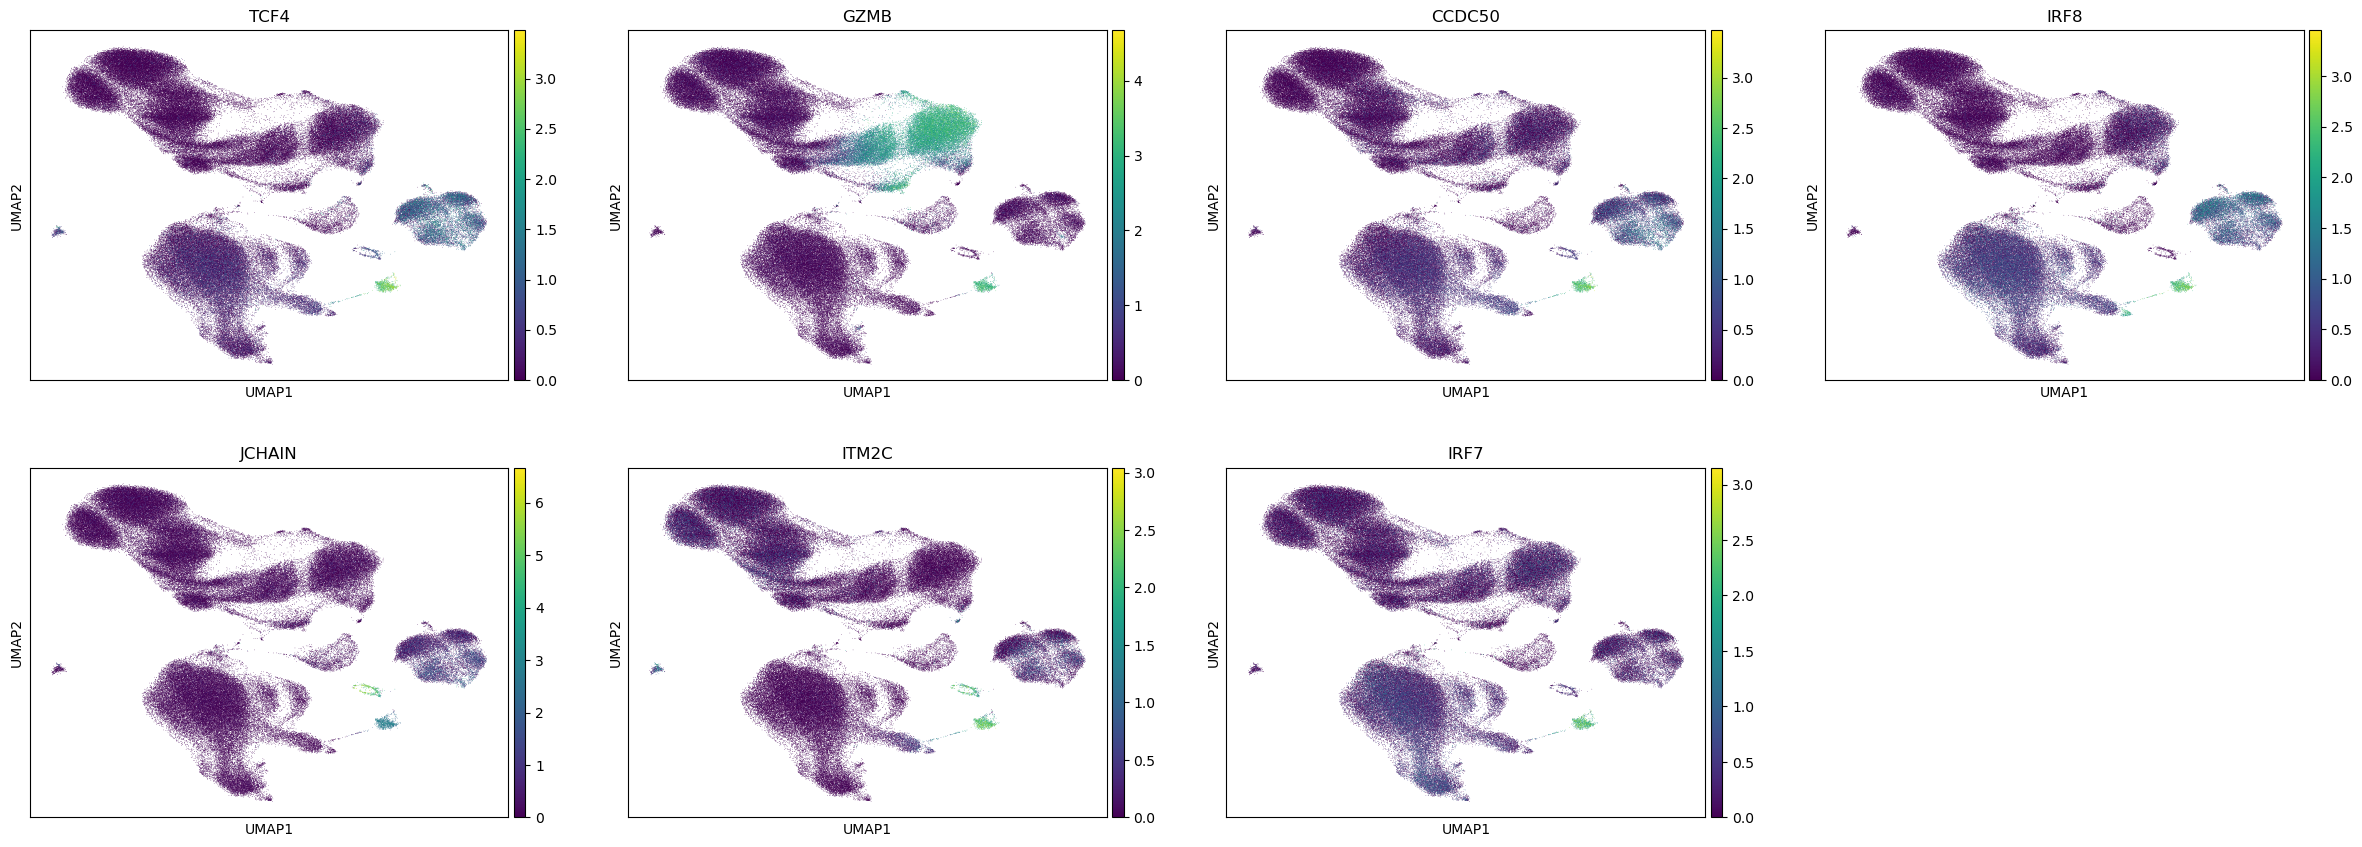

In [18]:
pDC_canon = annot[(annot['Cluster']=='Clus_pDC') & (annot['Cell.Type']=='Plasmacytoid dendritic cell')]['canonical.marker.overlap'].tolist()[0]
print(pDC_canon)
sc.pl.umap(adata, color=pDC_canon)

### Treg

In [ ]:
annot[annot['Cluster']=='Clus_Treg']

In [ ]:
Treg_canon = annot[(annot['Cluster']=='Clus_Treg') & (annot['Cell.Type']=='Naive regulatory T cell')]['canonical.marker.overlap'].tolist()[0]
print(Treg_canon)
sc.pl.umap(adata, color=Treg_canon)